# AI Project for SWE 485 | G3 | Water Quality
Student Name : Khawlah Alnayel | Student ID : 441200943 

Student Name : Sarah Alomar  | Student ID : 441200917 

 Student Name : Hessah Aljohaimy  | Student ID : 441201152

# Introducation
 Every human being needs clean water for intake. The World Health Organization (WHO) estimates that 80% of illnesses are water-borne. Industrialization, discharge of internal waste, radioactive waste, population growth, unnecessary use of pesticides, fertilizers and leakage from water tanks are key sources of water effluence. In Addition, there are negative health effects associated with these wastes. Different chemicals have dissimilar affects depending on their positions and categories. Bacterial, viral and parasitic diseases like typhoid, cholera, encephalitis, poliomyelitis, hepatitis, skin infection and gastrointestinal disease are spreading through polluted water [1]. 

Therefore, it is recommended to examine the water quality on a regular basis to avoid its destructive effects on human health. As a matter of fact, the availability of safe drinking water is one of the most vital components of effective health protection policy and constitutes a fundamental human right. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions [2]. 

Our aim to predict the quality of water from 3272 different water bodies where we have the pH value ,Hardness , Solids , Chloramines , Sulfate , Conductivity , Organic carbon , Trihalomethanes , Turbidity all in different values then we have the probability to indicate whether the water is safe or not and to understand the relationship between these different values and the quality of water .Our class label will be the pobability that indicates weather the water is safe or not. 

[1]mportance of safe drinking water for human life - researchgate (no date). Available at: https://www.researchgate.net/publication/341539508_Importance_of_Safe_Drinking_Water_for_Human_Life (Accessed: April 23, 2023).
 
[2]Kadiwal, A. (2021) Water quality, Kaggle. Available at: https://www.kaggle.com/datasets/adityakadiwal/water-potability (Accessed: April 23, 2023). 

In [85]:
#Importing Important Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean 
from pandas.core.arrays.categorical import contains
import statistics
import seaborn as sns
import warnings #to remove the warnings
warnings.filterwarnings('ignore')


# Data 
Our dataset is called Water quality, we take it from Kaggle website. The dataset provide information about factors that affect the quality of water if it is safe for human. The link (https://www.kaggle.com/datasets/adityakadiwal/water-potability) show the source data. It consist of 3276 row and each of which have 10 attributes.

Column description and type:

1. ph: pH of 1. water (0 to 14). Type : Numeric
2. Hardness: Capacity of water to precipitate soap in mg/L. Type : Numeric
3. Solids: Total dissolved solids in ppm. Type : Numeric
4. Chloramines: Amount of Chloramines in ppm. Type : Numeric
5. Sulfate: Amount of Sulfates dissolved in mg/L. Type : Numeric
6. Conductivity: Electrical conductivity of water in μS/cm. Type : Numeric
7. Organic_carbon: Amount of organic carbon in ppm. Type : Numeric
8. Trihalomethanes: Amount of Trihalomethanes in μg/L. Type : Numeric
9. Turbidity: Measure of light emiting property of water in NTU. Type : Numeric
10. Potability: Our dataset classified based on Potability which indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.. Potable 1 and Not potable 0. Type : Numeric



In [86]:
iris =pd.read_csv('Dataset/water_potability.csv')


In [87]:
# samples of raw dataset
iris.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [88]:
# table distribition for each variable:
for x in iris.columns:
    print(iris[x].value_counts())

3.716080    1
6.704432    1
5.915807    1
8.136498    1
6.493764    1
           ..
7.808012    1
5.895949    1
7.269652    1
9.489601    1
7.874671    1
Name: ph, Length: 2785, dtype: int64
204.890455    1
134.560276    1
170.190912    1
237.461099    1
171.238926    1
             ..
218.237186    1
208.374188    1
142.145566    1
179.799917    1
195.102299    1
Name: Hardness, Length: 3276, dtype: int64
20791.318981    1
15979.334793    1
37000.955674    1
18736.190902    1
12289.900922    1
               ..
22824.699465    1
21809.709834    1
45141.686036    1
17037.725367    1
17404.177061    1
Name: Solids, Length: 3276, dtype: int64
7.300212     1
9.504361     1
6.217223     1
5.599870     1
10.786500    1
            ..
8.696479     1
5.846112     1
6.030640     1
6.378364     1
7.509306     1
Name: Chloramines, Length: 3276, dtype: int64
368.516441    1
301.230848    1
391.918229    1
330.905370    1
402.313427    1
             ..
359.710517    1
389.219586    1
337.231469  

In [89]:
#missing data
iris.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Note: Change presentation of figures to Image

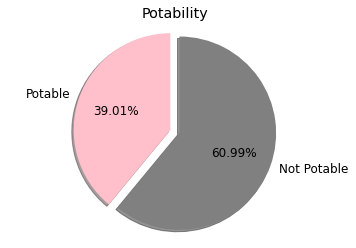

In [90]:
labels= ['Potable', 'Not Potable']
colors=['pink', 'gray']

Potable=iris['Potability']
NumOfPotable=0
NumOfNotPotable=0


for x in Potable:
    if x==1:
        NumOfPotable+=1

    else:
        NumOfNotPotable+=1

sizes= [NumOfPotable, NumOfNotPotable]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0 ), autopct='%1.2f%%')
plt.title('Potability')
plt.axis('equal')
plt.show()

As we see in figure above and down,the potable water which means the water is safe represent 39.01% 
( about 1278 )of our dataset, while Not potable water represent 60.99% ( about 1998 ).


In [91]:

chart = {'Potable' : NumOfPotable, 'Not Potable' : NumOfNotPotable}
label = list(chart.keys())
value = list(chart.values())
colors = {'Potable':'pink', 'Not potable':'gray'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.ylabel('Count')
plt.bar(label, value,color=['pink', 'gray'])
plt.show()

TypeError: 'numpy.ndarray' object is not callable

The mean of ph is  7.080794504276835
The variance of ph is  2.5418547277358927


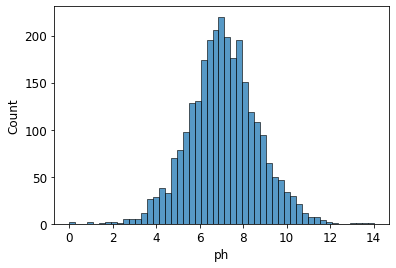

In [92]:
sns.histplot(x='ph',data=iris)

list = iris['ph'].copy().values
list = list[~np.isnan(list)]

print("The mean of ph is " , mean(list))
print("The variance of ph is " , statistics.variance(list))

plt.show()

Our dataset have different values of ph As shown in figure above. The range is between 0 and 14,
Almost ph values are 7. The lowest values are between 12 to 14 and between 2 to 1. The mean of ph is 7.085 and variance is  2.54.


The mean of Hardness is  196.36949601730154
The variance of Hardness is  1081.0787147379974


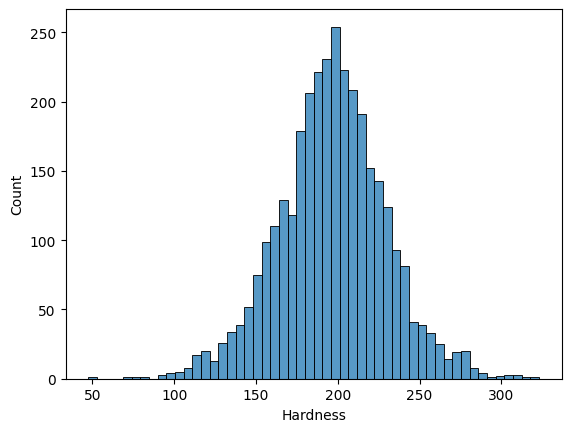

In [16]:
sns.histplot(x='Hardness',data=iris)

list = iris['Hardness'].copy().values
list = list[~np.isnan(list)]

print("The mean of Hardness is " , mean(list))
print("The variance of Hardness is " , statistics.variance(list))

plt.show()

According to the graphs we can see that almost of values of the Hardness is 200. Hardness between 50-100 and above 300 have the lowest frequency. The mean is 196.36 and the variance is .

The mean of Solids is  22014.092526077104
The variance of Solids is  76887834.36189838


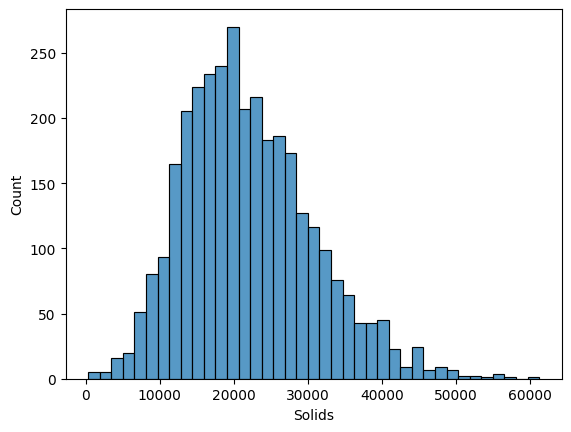

In [17]:
sns.histplot(x='Solids',data=iris)

list = iris['Solids'].copy().values
list = list[~np.isnan(list)]

print("The mean of Solids is " , mean(list))
print("The variance of Solids is " , statistics.variance(list))

plt.show()

From the figure above we can notice that solid values start from 0 to Almost 60000. The distribution of solids is higher is the left which means most of our dataset have frequency between 20K to 15K. The mean of  Solids is 22014.09 and the variance is 76887834.36.

The mean of Chloramines is  7.122276793425787
The variance of Chloramines is  2.50615776590587


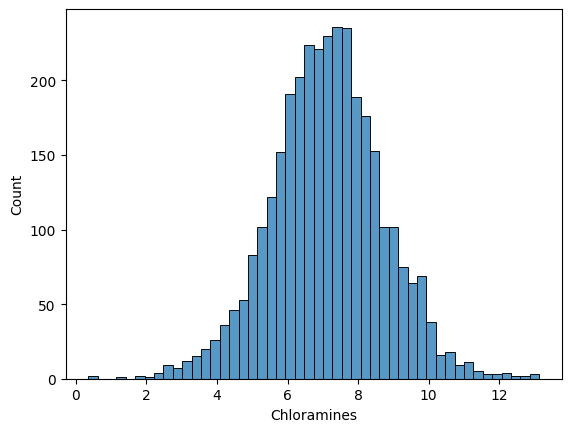

In [18]:
sns.histplot(x='Chloramines',data=iris)

list = iris['Chloramines'].copy().values
list = list[~np.isnan(list)]

print("The mean of Chloramines is " , mean(list))
print("The variance of Chloramines is " , statistics.variance(list))

plt.show()

As we can see above, chloramines variable have the highest frequency in almost 7. The mean is 7.12 and the variance is 2.50.

The mean of Sulfate is  333.77577661081347
The variance of Sulfate is  1715.3546738276493


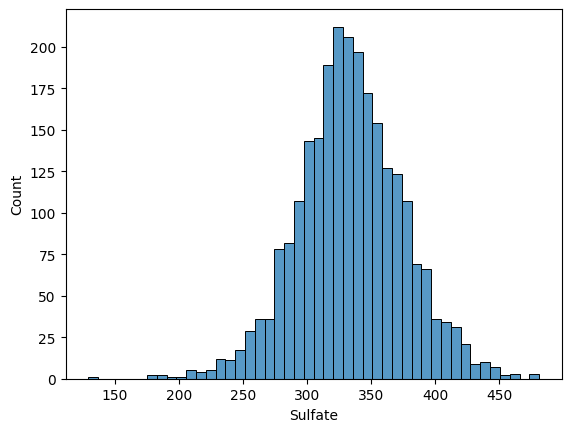

In [19]:
sns.histplot(x='Sulfate',data=iris)

list = iris['Sulfate'].copy().values
list = list[~np.isnan(list)]

print("The mean of Sulfate is " , mean(list))
print("The variance of Sulfate is " , statistics.variance(list))

plt.show()

According to image we can see that the distribution of sulfate in our dataset is little bit to right side. So , we have the most frequency in almost between 300 and 350. The mean is 333.77 and the variance is 1715.35.

The mean of Conductivity is  426.20511068255325
The variance of Conductivity is  6532.529329738223


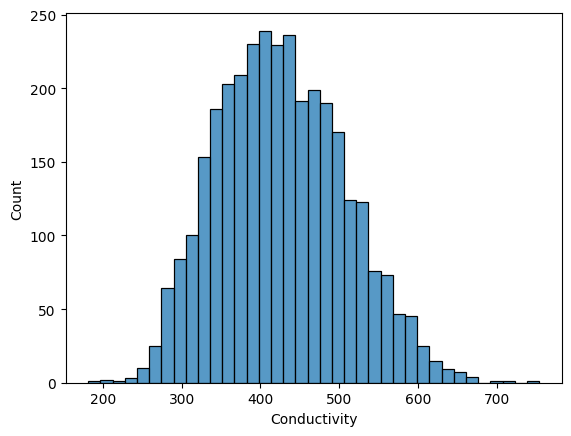

In [20]:
sns.histplot(x='Conductivity',data=iris)

list = iris['Conductivity'].copy().values
list = list[~np.isnan(list)]

print("The mean of Conductivity is " , mean(list))
print("The variance of Conductivity is " , statistics.variance(list))

plt.show()

According to the graphs we can see that almost of the frequency is near to 400. The mean is 426.20 and the variance is 6532.52.

The mean of Organic_carbon is  14.284970247677318
The variance of Organic_carbon is  10.943935812467114


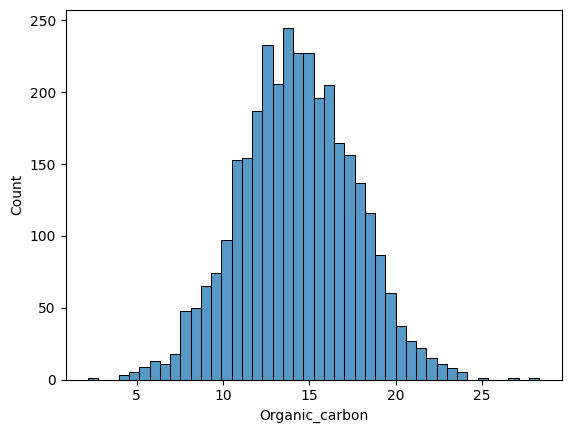

In [21]:
sns.histplot(x='Organic_carbon',data=iris)

list = iris['Organic_carbon'].copy().values
list = list[~np.isnan(list)]

print("The mean of Organic_carbon is " , mean(list))
print("The variance of Organic_carbon is " , statistics.variance(list))

plt.show()

We can see that most of the water have organic carbon near to 15. Also , there is a very small frequency having 25 and above. The mean is 14.28 and the variance is 10.94.

The mean of Trihalomethanes is  66.39629294676803
The variance of Trihalomethanes is  261.6308974588445


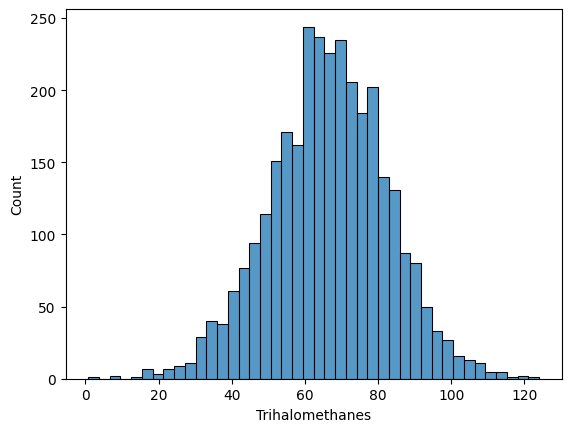

In [22]:
sns.histplot(x='Trihalomethanes',data=iris)

list = iris['Trihalomethanes'].copy().values
list = list[~np.isnan(list)]

print("The mean of Trihalomethanes is " , mean(list))
print("The variance of Trihalomethanes is " , statistics.variance(list))

plt.show()

We can see that, the highest value of frequency is between 60 to 80, which mean the huge amount water sample have Trihalomethanes in these range. The mean is 66.39 and the variance is 261.63.

The mean of Turbidity is  3.9667861697910585
The variance of Turbidity is  0.608996703473493


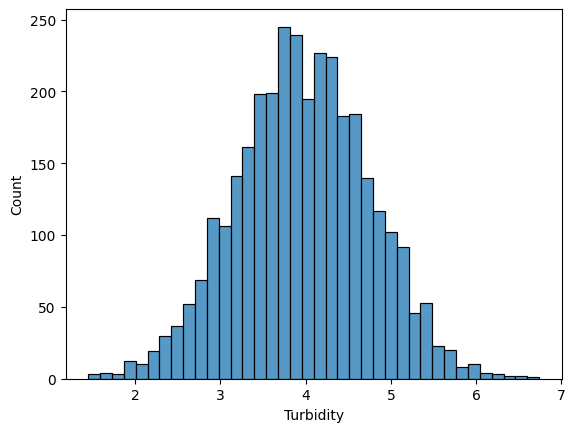

In [23]:
sns.histplot(x='Turbidity',data=iris)


list = iris['Turbidity'].copy().values
list = list[~np.isnan(list)]

print("The mean of Turbidity is " , mean(list))
print("The variance of Turbidity is " , statistics.variance(list))

plt.show()

According to the above. We have the highest frequency of water sample near to Turbidity 4. The mean is 3.96 and the variance is 0.60. 

# Data Preprocessing

In this part, we only needed to discretization, and remove the null value, which is what our dataset need for it 

# 1. Remove null value

In [93]:
iris

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


the dataset is contain 3276 rows before remove null value

In [94]:
iris.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

before remove null value:
1. ph contain 491 null value
2. Sulfate contain 781 null value
3. Trihalomethanes contain 162 null value

In [95]:
iris=iris.dropna()

In [96]:
iris

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


number of rows after remove null value are 2011

In [97]:
iris.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

after remove null value all null value are removed

# 2.Discretization

In the classification of pH, we divided it into 3 categories, acidic, neutral, and alkaline:
1. acidic from 0 to 6.5 wich represented as 1
2. neutral from 6.5 to 8.5 wich represented as 2
3. alkaline from 8.5 to 14 wich represented as 3

In [98]:
iris['ph']=pd.cut(x=iris['ph'], bins=[0,6.5,8.5,14], labels=[1, 2 , 3])

In the classification of Hardness, we divided it into 4 categories, Soft, Mod Hard,Hard, and Very Hard:
1. Soft from 0 to 60 wich represented as 1
2. Mod Hard from 60 to 120 wich represented as 2
3. Hard from 120 to 180 wich represented as 3
4. Very Hard from 180 to 1000000 wich represented as 4

In [99]:
iris['Hardness']=pd.cut(x=iris['Hardness'], bins=[0,60,120,180,1000000], labels=[1, 2 , 3 , 4])

The remaining minerals were divided into 3 categories, which are 1, 2 and 3

In [100]:
iris['Chloramines']=pd.qcut(x=iris['Chloramines'], q=3, labels=[1, 2 , 3])

In [101]:
iris['Conductivity']=pd.qcut(x=iris['Conductivity'], q=3, labels=[1, 2 , 3])

In [102]:
iris['Organic_carbon']=pd.qcut(x=iris['Organic_carbon'], q=3, labels=[1, 2 , 3])

In [103]:
iris['Solids']=pd.qcut(x=iris['Solids'], q=3, labels=[1, 2 , 3])

In [104]:
iris['Sulfate']=pd.qcut(x=iris['Sulfate'], q=3, labels=[1, 2 , 3])

In [105]:
iris['Trihalomethanes']=pd.qcut(x=iris['Trihalomethanes'], q=3, labels=[1, 2 , 3])

In [106]:
iris['Turbidity']=pd.qcut(x=iris['Turbidity'], q=3, labels=[1, 2 , 3])

In [107]:
iris

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,2,4,2,3,3,1,3,3,3,0
4,3,4,2,2,1,2,1,1,2,0
5,1,4,3,2,2,1,1,1,1,0
6,3,4,3,2,3,1,2,3,1,0
7,3,4,1,1,1,3,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...
3267,3,4,1,1,1,2,1,1,3,1
3268,2,4,1,2,1,1,3,1,1,1
3269,3,2,3,3,1,2,3,1,3,1
3270,1,4,3,3,2,2,1,2,2,1


our dataset after discretization, and remove null value contains 2011 rows and 10 columns.

# Phase2: supervised learning

**1. Logistic regression**



Logistic regression, also referred to as a logit model, is a statistical model commonly applied for predictive analytics and classification purposes. It predicts the likelihood of an event happening, such as voting or not voting, from a set of independent variables in a given dataset.[Source]

 
[Source]What is logistic regression? (no date) IBM. Available at: https://www.ibm.com/topics/logistic-regression#:~:text=Resources-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables. (Accessed: 10 May 2023).







First step we import libraries

In [108]:
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

Then we split data into training and testing, it will be 70% (1407) for training and 30%(604) for testing

In [109]:


target= iris['Potability']
data= iris[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30,random_state=0)

In [110]:
print("Number of training data" , len(y_train))

print("Number of testing data" , len(y_test))

Number of training data 1407
Number of testing data 604


Numeber of Potable (1) and not Potable (0) in training data

In [111]:
y_train.value_counts()

0    833
1    574
Name: Potability, dtype: int64

After that we build logistic regrssion classifer and fit the training data useing fit(), then we perform prediction on test set using predict()

In [112]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


Text(0.5, 15.0, 'predicted label')

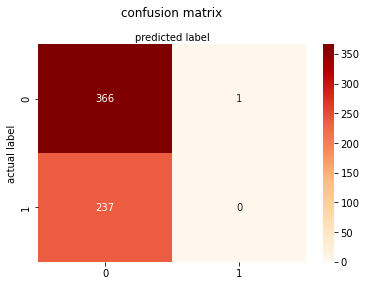

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

CNF_Matrix=metrics.confusion_matrix(y_test,y_pred)

class_name=[0,1]
fig, ax = plt.subplots()
tick_mark=np.arange(len(class_name))
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)

sns.heatmap(pd.DataFrame(CNF_Matrix),annot=True,cmap="OrRd",fmt='g')
ax.xaxis.set_label_position("top")
plt.title('confusion matrix',y=1.1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

TP= confusion matrix[1,1] ,
TN= confusion matrix[0,0] ,
FP= confusion matrix[0,1] ,
FN= confusion matrix[1,0]


As we can see here in confusion matrix we have TP=0, TN=366, FP=1 and FN=237

*Classification Report*

We will then use the classification_report() method to generate a report for both the Potable and Not Potable values. This report shows us the precision and recall score again for the Potability values, and it also shows the scores in terms of the Not Potable values. This report also shows us the f1-score, which combines the precision and recall scores to measure the model's accuracy, and the support. (Note: We generated this report just for more information about our model; we will not use these values when visualizing or comparing).

Here we obtain the report regarding the model where it has the precision that equals to 0.63 for the negative and 0.43 for the positive .Also , the recall is 0.61 for negative and 0.45 for positive.Along with the f1-score that is 0.62 for negative and 0.44 for positive .Lastly the support is 367 for negative and 237 for positive.Also , it shows the averages

In [114]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.75       367
           1       0.00      0.00      0.00       237

    accuracy                           0.61       604
   macro avg       0.30      0.50      0.38       604
weighted avg       0.37      0.61      0.46       604



In [115]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred)*100)
print("precision",metrics.precision_score(y_test,y_pred)*100)
print("Recall",metrics.recall_score(y_test,y_pred)*100)    
#accuracyScore1, precisionScore1, recallscore1, specifity1
accuracyScore1= metrics.accuracy_score(y_test,y_pred)
precisionScore1=metrics.precision_score(y_test,y_pred)
recallscore1=metrics.recall_score(y_test,y_pred)   

Accuracy 60.59602649006622
precision 0.0
Recall 0.0


The accurcy of logistic regrssion classifer is equal to 60.59% , Precision and Recall 0

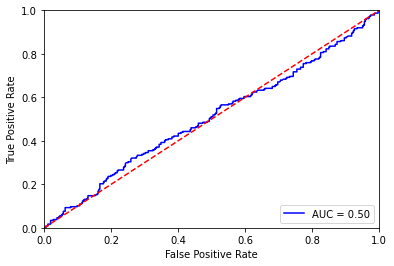

In [116]:
import sklearn.metrics as metrics
from matplotlib import pyplot as plt

classifier_log = LogisticRegression().fit(X_train, y_train)
probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# polt AUC
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The image obove is visualize ROC curve, which is represent the trade-off between sensitivity and specificity

**2.Decision Tree**

Decision tree methodology is a commonly used data mining method for establishing classification systems based on multiple covariates or for developing prediction algorithms for a target variable. This method classifies a population into branch-like segments that construct an inverted tree with a root node, internal nodes, and leaf nodes[source].

[source]Song, Y.-Y. and Lu, Y. (2015) Decision tree methods: Applications for classification and prediction, Shanghai archives of psychiatry. U.S. National Library of Medicine. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4466856/ (Accessed: May 4, 2023). 

In the first step, we will import the necessary libraries.

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

Then we will train the model using our dataset where we have splitted the dataset into two parts training and testing,
it will be 70% (1407) for training and 30%(604) for testing

In [118]:
target= iris['Potability']
data= iris[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30,random_state=0)


print("Number of training data" , len(y_train))
print("Number of testing data" , len(y_test))

Number of training data 1407
Number of testing data 604


After that by using the tress library from sklearn library we implmented the decision tree classifer to train it.

In [119]:
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
y_pred=model_tree.predict(X_test)

Text(0.5, 15.0, 'predicted label')

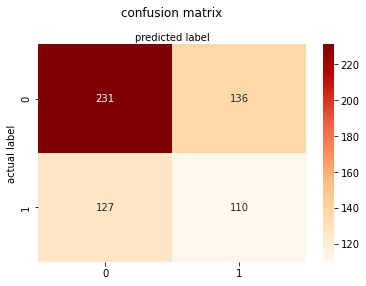

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

CNF_Matrix=metrics.confusion_matrix(y_test,y_pred)

class_name=[0,1]
fig, ax = plt.subplots()
tick_mark=np.arange(len(class_name))
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)

sns.heatmap(pd.DataFrame(CNF_Matrix),annot=True,cmap="OrRd",fmt='g')
ax.xaxis.set_label_position("top")
plt.title('confusion matrix',y=1.1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

Here , we obtain the confusion matrix we obtain the results which are TN=231 , TP=110 , FN=127 , FP = 136  

*Classification Report*

We will then use the classification_report() method to generate a report for both the Potable and Not Potable values. This report shows us the precision and recall score again for the Potability values, and it also shows the scores in terms of the Not Potable values. This report also shows us the f1-score, which combines the precision and recall scores to measure the model's accuracy, and the support. (Note: We generated this report just for more information about our model; we will not use these values when visualizing or comparing).

Here we obtain the report regarding the model where it has the precision that equals to 0.65 for the negative and 0.45 for the positive .Also , the recall is 0.63 for negative and 0.46 for positive.Along with the f1-score that is 0.64 for negative and 0.46 for positive .Lastly the support is 367 for negative and 237 for positive.Also , it shows the averages

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       367
           1       0.45      0.46      0.46       237

    accuracy                           0.56       604
   macro avg       0.55      0.55      0.55       604
weighted avg       0.57      0.56      0.57       604



In [122]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred)*100)
print("precision",metrics.precision_score(y_test,y_pred)*100)
print("Recall",metrics.recall_score(y_test,y_pred)*100) 

accuracyScore2= metrics.accuracy_score(y_test,y_pred)
precisionScore2=metrics.precision_score(y_test,y_pred)
recallscore2=metrics.recall_score(y_test,y_pred) 

Accuracy 56.456953642384114
precision 44.71544715447154
Recall 46.41350210970464


Here we calculated the Accuracy of the model which is 56.95 and the Precision which is 45.14 and the Recall is 45.14.

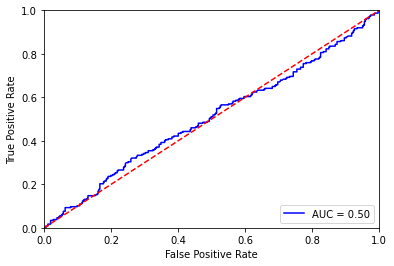

In [123]:
import sklearn.metrics as metrics
from matplotlib import pyplot as plt

classifier_log = LogisticRegression().fit(X_train, y_train)
probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# polt AUC
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The image obove is visualize ROC curve, which is represent the trade-off between sensitivity and specificity as the AUC is 0.50 and that indicates that the model did not classify the data set correctly.

*Descsion tree visulization*

Finally, the last step is to vizualize our tree and compare the reults. Firstly, we will visualize our decision tree using the plot_tree method from the 'matplotib' library. The visualization will be a plot tree that showcases the branching of our decision tree along with some information for each node.(note: we obtained that the tree appeard to be complecated and hard to read although we trained the model with the preprocessed dataset .It also shows how the DT reached to the results)

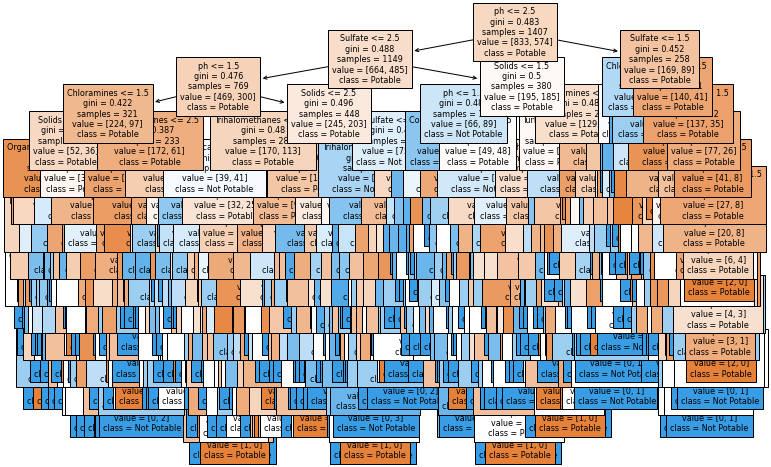

In [124]:
from sklearn import tree
from matplotlib import pyplot as plt

#We will use this method to visualize our tree.
fig = plt.figure(figsize=(12,8))
_ = tree.plot_tree(model_tree, 
                   feature_names=X.columns,  
                   class_names={0:'Potable', 1:'Not Potable'},
                   filled=True,
                  fontsize=8)


**SVM Classifier**

*Support Vector Machines* (SVMs in short) are supervised machine learning algorithms that are used for classification and regression purposes.SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.[source]

*Hyperplane*
A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin.

*Support Vectors*
Support vectors are the sample data points, which are closest to the hyperplane.


*Margin*
A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points.


[source]prashant111 (2020) SVM classifier tutorial, Kaggle. Available at: https://www.kaggle.com/code/prashant111/svm-classifier-tutorial (Accessed: 04 May 2023). 


*Import libraries*

We will import the needed libraries for classifing along with the Kfold libraries to preform cross folding.

In [129]:
# Improving SVM

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


import warnings

warnings.filterwarnings('ignore')






Exploring the dataset before training the SVM model.

In [130]:

#What are the value counts after the data preprocessing 
iris['Potability'].value_counts()
#Getting the information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               2011 non-null   category
 1   Hardness         2011 non-null   category
 2   Solids           2011 non-null   category
 3   Chloramines      2011 non-null   category
 4   Sulfate          2011 non-null   category
 5   Conductivity     2011 non-null   category
 6   Organic_carbon   2011 non-null   category
 7   Trihalomethanes  2011 non-null   category
 8   Turbidity        2011 non-null   category
 9   Potability       2011 non-null   int64   
dtypes: category(9), int64(1)
memory usage: 50.3 KB


*Training the model*

Here we will start training the model first by dropping the class label which in our case is Potability attribute.

In [131]:
# Dropping the class label
X = iris.drop(['Potability'], axis=1)

y = iris['Potability']

Here we splitted the dataset into two parts : Traing and Testing .

In [132]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify=y)

Here we defined a variable kfold to preform the cross folding and choose the k to be 10.

In [133]:
# defining kfold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

# number of splits = 10


After that we imported the SVM library and the specific type SVC library and accuracy score library. Moreover, we train the model using our dataset afte we did the preprocessing as it shown below.

In [134]:
# import SVC classifier
from sklearn import svm
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

model_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

y_pred=model_svm.predict(X_test)
results = cross_val_score(model_svm, X_train, y_train, cv=kfold, scoring='accuracy')


Here we calculated the Accuracy equals to 59.55 and Precision equals to 0 and Recall equals to 0.

In [135]:
import seaborn as sns
from sklearn import metrics
print("Accuracy",metrics.accuracy_score(y_test,y_pred)*100)
print("precision",metrics.precision_score(y_test,y_pred)*100)
print("Recall",metrics.recall_score(y_test,y_pred)*100)  

accuracyScore3= metrics.accuracy_score(y_test,y_pred)
precisionScore3=metrics.precision_score(y_test,y_pred)
recallscore3=metrics.recall_score(y_test,y_pred)

Accuracy 59.553349875930515
precision 0.0
Recall 0.0


Here we preformed the 10 fold cross-validation and printed the results we hoped it will improve the resultes but as it shows the best accuracy can gets is 0.627 and 62.7% it has improved yet it is still low.

In [136]:
#do a 10 fold cross-validation 
results_svm = cross_val_score(model_svm, X_train,y_train, cv=kfold,scoring='accuracy')
print("\n10-fold cross-validation:")
print(results_svm)


10-fold cross-validation:
[0.62111801 0.60869565 0.59627329 0.57142857 0.62732919 0.54658385
 0.55279503 0.59006211 0.61875    0.6375    ]


Here We implement the confusion matrix and obtaind the results which are 240 true negative and 163 are false neagtive and the true positive and false positive are both 0.

Text(0.5, 15.0, 'predicted label')

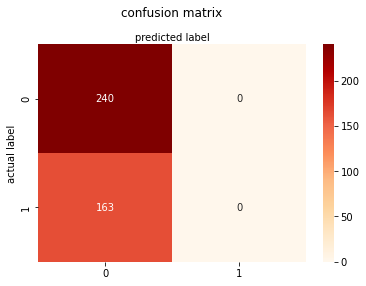

In [137]:
# visualize confusion matrix with seaborn heatmap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

CNF_Matrix=metrics.confusion_matrix(y_test,y_pred)

class_name=[0,1]
fig, ax = plt.subplots()
tick_mark=np.arange(len(class_name))
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)

sns.heatmap(pd.DataFrame(CNF_Matrix),annot=True,cmap="OrRd",fmt='g')
ax.xaxis.set_label_position("top")
plt.title('confusion matrix',y=1.1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

*Classification Report*

We will then use the classification_report() method to generate a report for both the Potable and Not Potable values. This report shows us the precision and recall score again for the Potability values, and it also shows the scores in terms of the Not Potable values. This report also shows us the f1-score, which combines the precision and recall scores to measure the model's accuracy, and the support. (Note: We generated this report just for more information about our model; we will not use these values when visualizing or comparing).

Here we obtain the report regarding the model where it has the precision that equals to 0.60 for the negative and 0 for the positive .Also , the recall is 1 for negative and 0 for positive.Along with the f1-score that is 0.75 for negative and 0 for positive .Lastly the support is 240 for negative and 163 for positive.Also , it shows the averages

In [138]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       240
           1       0.00      0.00      0.00       163

    accuracy                           0.60       403
   macro avg       0.30      0.50      0.37       403
weighted avg       0.35      0.60      0.44       403



In the ROC Curve below the line is stright and parallel to the curve therefore it shows that the model is not predecting and not knowing the dataset right .And this result occurs from the values that are in  the dataset where they are unclear!

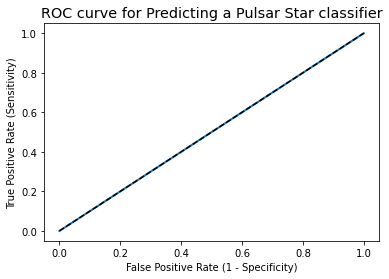

In [139]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# comparison
--------------------------------------------------------------------------------------------------------------------------------

As we can see in the three supervised learning methods, namely:
1. Logistic Regression 
2. Decision Tree 
3. SVM Classifier


The accuracy values are close and tend to be low in all three methods. After the research, it was discovered that the problem is related to our data set.

As mentioned above, we see that the accuracy value in 

Logistic Regression is 60.59, 

Decision Tree is 56.45, 

and the SVM is 59.7.

--------------------------------------------------------------

 From the list of accuracy we obtained, we conclude that Logistic Regression is the best in accuracy because it has the largest value.


As for the Recall of 

Logistic Regression it is 0.0,

 Decision Tree is 46.41,

  and SVM is 0.0

--------------------------------------------------------------

Thus, we conclude that the Decision Tree  has  better recall as it has the highest value


As for the Precision of 

Logistic Regression it is 0.0, 

Decision Tree is 44.71, 

and SVM is 0.0

Therefore, we figure that the Decision Tree has better Precision as it holds the highest value


**Visualization**

*Model comparision* 

--------------------------------------------------------------

In visualization below we can obtain that the three models gives a close results regarding the Acccuracy and Precision and Recall Score .From that we obtain that the dataset was unclaer to the models to train from and enven we have used a cross folding methods and we did the preprossing for our data set it is still gives a bad results.But , Among the models for our data set the Decision Tree model gave us the best results among the three models. 

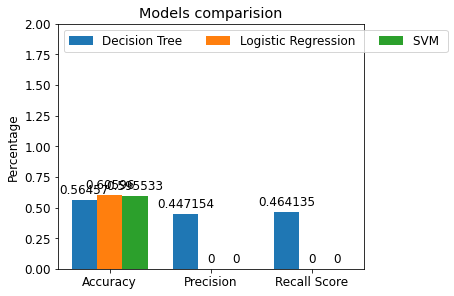

In [140]:
# data from https://allisonhorst.github.io/palmerpenguins/

compare = ("Accuracy", "Precision", "Recall Score")
models = {
    'Decision Tree': (accuracyScore2, precisionScore2, recallscore2),
    'Logistic Regression': (accuracyScore1, precisionScore1, recallscore1),
    'SVM ':(accuracyScore3, precisionScore3, recallscore3)
}

x = np.arange(len(compare))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in models.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Models comparision')
ax.set_xticks(x + width, compare)
ax.legend(loc='upper left', ncol=3)
ax.set_ylim(0, 2)

plt.show()